In [4]:
import warnings
warnings.filterwarnings('ignore')

import os
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import cv2
from ultralytics import YOLO


In [5]:
model = YOLO('yolov8n-seg.pt')

In [6]:
import yaml

In [7]:
dataset_path = 'C:\\Users\\saksh\\OneDrive\\Desktop\\ML Projects\\Public Grievances(NICSI)\\data\\potholes'

yaml_file_path = os.path.join(dataset_path, 'data.yaml')
with open(yaml_file_path, 'r') as file:
    yaml_content = yaml.load(file, Loader=yaml.FullLoader)
    print(yaml.dump(yaml_content, default_flow_style=False))

names:
- Pothole
nc: 1
roboflow:
  license: CC BY 4.0
  project: pothole_segmentation_yolov8
  url: https://universe.roboflow.com/farzad/pothole_segmentation_yolov8/dataset/1
  version: 1
  workspace: farzad
train: ../train/images
val: ../valid/images



In [8]:
sns.set(rc={'axes.facecolor': '#ffe4de'}, style='darkgrid')

In [9]:
train_path = os.path.join(dataset_path, 'train', 'images')
valid_path = os.path.join(dataset_path, 'valid', 'images')

In [10]:
train_sizes = set()
valid_sizes = set()

In [11]:
train_num=0
valid_num=0

In [12]:
from PIL import Image

In [13]:
for filename in os.listdir(train_path):
    if filename.endswith('.jpg'):  
        train_num += 1
        image_path = os.path.join(train_path, filename)
        with Image.open(image_path) as img:
            train_sizes.add(img.size)


In [14]:
for filename in os.listdir(valid_path):
    if filename.endswith('.jpg'): 
        valid_num += 1
        image_path = os.path.join(valid_path, filename)
        with Image.open(image_path) as img:
            valid_sizes.add(img.size)

In [15]:
print(train_num)
print(valid_num)

720
60


In [28]:
history = model.train(data=yaml_file_path, epochs=140, imgsz=640, patience=15, batch=16,optimizer='auto',lr0=0.0001,              
    lrf=0.01,dropout=0.25,device=0, seed=42)

New https://pypi.org/project/ultralytics/8.2.30 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.28  Python-3.11.4 torch-2.2.2+cu121 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
engine\trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=C:\Users\saksh\OneDrive\Desktop\ML Projects\Public Grievances(NICSI)\data\potholes\data.yaml, epochs=140, time=None, patience=15, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train22, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.25, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augmen

train: Scanning C:\Users\saksh\OneDrive\Desktop\ML Projects\Public Grievances(NICSI)\data\potholes\train\labels.cache..
val: Scanning C:\Users\saksh\OneDrive\Desktop\ML Projects\Public Grievances(NICSI)\data\potholes\valid\labels.cache... 


Plotting labels to runs\segment\train22\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\segment\train22
Starting training for 140 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/140       2.8G      1.137       1.85     0.9674       1.21         86        640: 100%|██████████| 45/45 [00:18
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all         60        201      0.662      0.672      0.692      0.401      0.672      0.682      0.706      0.399



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/140      2.76G      1.179      1.904       1.02      1.225         65        640: 100%|██████████| 45/45 [00:16
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all         60        201      0.628      0.602      0.632      0.362      0.674      0.607      0.647      0.345



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/140      2.77G      1.225      1.992       1.06      1.257         84        640: 100%|██████████| 45/45 [00:16
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all         60        201      0.689      0.517      0.587      0.322      0.686      0.562      0.611      0.319



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/140      2.76G      1.246      1.946      1.047       1.26         79        640: 100%|██████████| 45/45 [00:19
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all         60        201      0.562      0.657      0.562      0.289      0.572      0.619      0.563      0.274



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/140      2.79G      1.268      1.987      1.064      1.279         71        640: 100%|██████████| 45/45 [00:19
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all         60        201      0.599      0.512      0.558      0.296      0.663       0.51      0.581      0.289



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/140      2.84G      1.237      1.973      1.058      1.269         85        640: 100%|██████████| 45/45 [00:19
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all         60        201      0.662      0.595      0.595      0.327        0.7      0.602      0.627       0.32



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/140      2.87G      1.195      1.918     0.9983      1.234         67        640: 100%|██████████| 45/45 [00:19
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all         60        201      0.668       0.64      0.665      0.357      0.683      0.652      0.674      0.342



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/140      2.85G       1.22      1.964      1.017      1.245         46        640: 100%|██████████| 45/45 [00:18
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all         60        201       0.56      0.542      0.529      0.262      0.568      0.536      0.539      0.254



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/140      2.76G      1.202      1.918      1.016      1.233         58        640: 100%|██████████| 45/45 [00:20
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all         60        201      0.634      0.612      0.621      0.353      0.634      0.612      0.637      0.339



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/140      2.76G      1.173      1.906     0.9897      1.229         75        640: 100%|██████████| 45/45 [00:18
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all         60        201       0.64      0.592      0.634       0.36      0.669      0.617      0.673       0.34



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/140      2.74G       1.16      1.854     0.9655      1.208         62        640: 100%|██████████| 45/45 [00:20
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all         60        201      0.607      0.637      0.624      0.351      0.643      0.647      0.635      0.332



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/140      2.79G      1.138      1.801     0.9248      1.191         74        640: 100%|██████████| 45/45 [00:19
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all         60        201      0.662      0.612      0.636      0.384       0.69       0.63      0.654      0.362



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/140      2.83G       1.15      1.836     0.9331      1.213         74        640: 100%|██████████| 45/45 [00:18
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all         60        201      0.588      0.667      0.627      0.353      0.607      0.687      0.644      0.341



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/140      2.71G      1.173      1.855     0.9778      1.223         60        640: 100%|██████████| 45/45 [00:19
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all         60        201      0.671      0.628      0.645      0.353      0.672      0.612      0.631      0.342



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/140      2.79G      1.153      1.831     0.9161      1.204         59        640: 100%|██████████| 45/45 [00:19
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all         60        201      0.733      0.607      0.638      0.358      0.761      0.635      0.673      0.352



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/140      2.81G      1.138      1.816     0.9051      1.178         62        640: 100%|██████████| 45/45 [00:20
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all         60        201      0.684      0.593      0.655      0.371      0.728      0.612      0.686       0.38
EarlyStopping: Training stopped early as no improvement observed in last 15 epochs. Best results observed at epoch 1, best model saved as best.pt.
To update EarlyStopping(patience=15) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



16 epochs completed in 0.110 hours.
Optimizer stripped from runs\segment\train22\weights\last.pt, 6.8MB
Optimizer stripped from runs\segment\train22\weights\best.pt, 6.8MB

Validating runs\segment\train22\weights\best.pt...
Ultralytics YOLOv8.2.28  Python-3.11.4 torch-2.2.2+cu121 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
YOLOv8n-seg summary (fused): 195 layers, 3258259 parameters, 0 gradients, 12.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP


                   all         60        201      0.662      0.673      0.692      0.403      0.672      0.683      0.707      0.399
Speed: 0.3ms preprocess, 7.3ms inference, 0.0ms loss, 3.1ms postprocess per image
Results saved to runs\segment\train22


In [29]:
after_train_files_path = 'runs\\segment\\train22'

In [30]:
history_file_path = os.path.join(after_train_files_path, 'results.png')

In [31]:
history_csv_path = os.path.join(after_train_files_path, 'results.csv')

In [32]:
final_model_path = os.path.join(after_train_files_path, 'weights/best.pt')
final_model = YOLO(final_model_path)
metrics = final_model.val(split='val')

Ultralytics YOLOv8.2.28  Python-3.11.4 torch-2.2.2+cu121 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
YOLOv8n-seg summary (fused): 195 layers, 3258259 parameters, 0 gradients, 12.0 GFLOPs


val: Scanning C:\Users\saksh\OneDrive\Desktop\ML Projects\Public Grievances(NICSI)\data\potholes\valid\labels.cache... 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP


                   all         60        201      0.662      0.672      0.692      0.401      0.672      0.682      0.706      0.399
Speed: 1.0ms preprocess, 13.6ms inference, 0.0ms loss, 6.8ms postprocess per image
Results saved to runs\segment\val3


In [33]:
metrics_df = pd.DataFrame.from_dict(metrics.results_dict, orient='index', columns=['Metric Value'])

# Display the DataFrame
metrics_df.round(3)

Metric Value
metrics/precision(B)         0.662
metrics/recall(B)            0.672
metrics/mAP50(B)             0.692
metrics/mAP50-95(B)          0.401
metrics/precision(M)         0.672
metrics/recall(M)            0.682
metrics/mAP50(M)             0.706
metrics/mAP50-95(M)          0.399
fitness                      0.860


image 1/1 C:\Users\saksh\OneDrive\Desktop\ML Projects\Public Grievances(NICSI)\data\potholes\valid\images\pic-114-_jpg.rf.a0f30e06b3b96d7879d5f55a7012433c.jpg: 640x640 1 Pothole, 45.6ms
Speed: 5.0ms preprocess, 45.6ms inference, 14.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 C:\Users\saksh\OneDrive\Desktop\ML Projects\Public Grievances(NICSI)\data\potholes\valid\images\pic-144-_jpg.rf.61a3b886f058ed3a4788426cfa7c4988.jpg: 640x640 2 Potholes, 45.6ms
Speed: 5.0ms preprocess, 45.6ms inference, 21.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 C:\Users\saksh\OneDrive\Desktop\ML Projects\Public Grievances(NICSI)\data\potholes\valid\images\pic-165-_jpg.rf.82b3db37518b15aa73be6e4093deaf46.jpg: 640x640 2 Potholes, 44.5ms
Speed: 5.5ms preprocess, 44.5ms inference, 21.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 C:\Users\saksh\OneDrive\Desktop\ML Projects\Public Grievances(NICSI)\data\potholes\valid\images\pic-184-_jpg.rf.cb753b5f714073fc4a8c

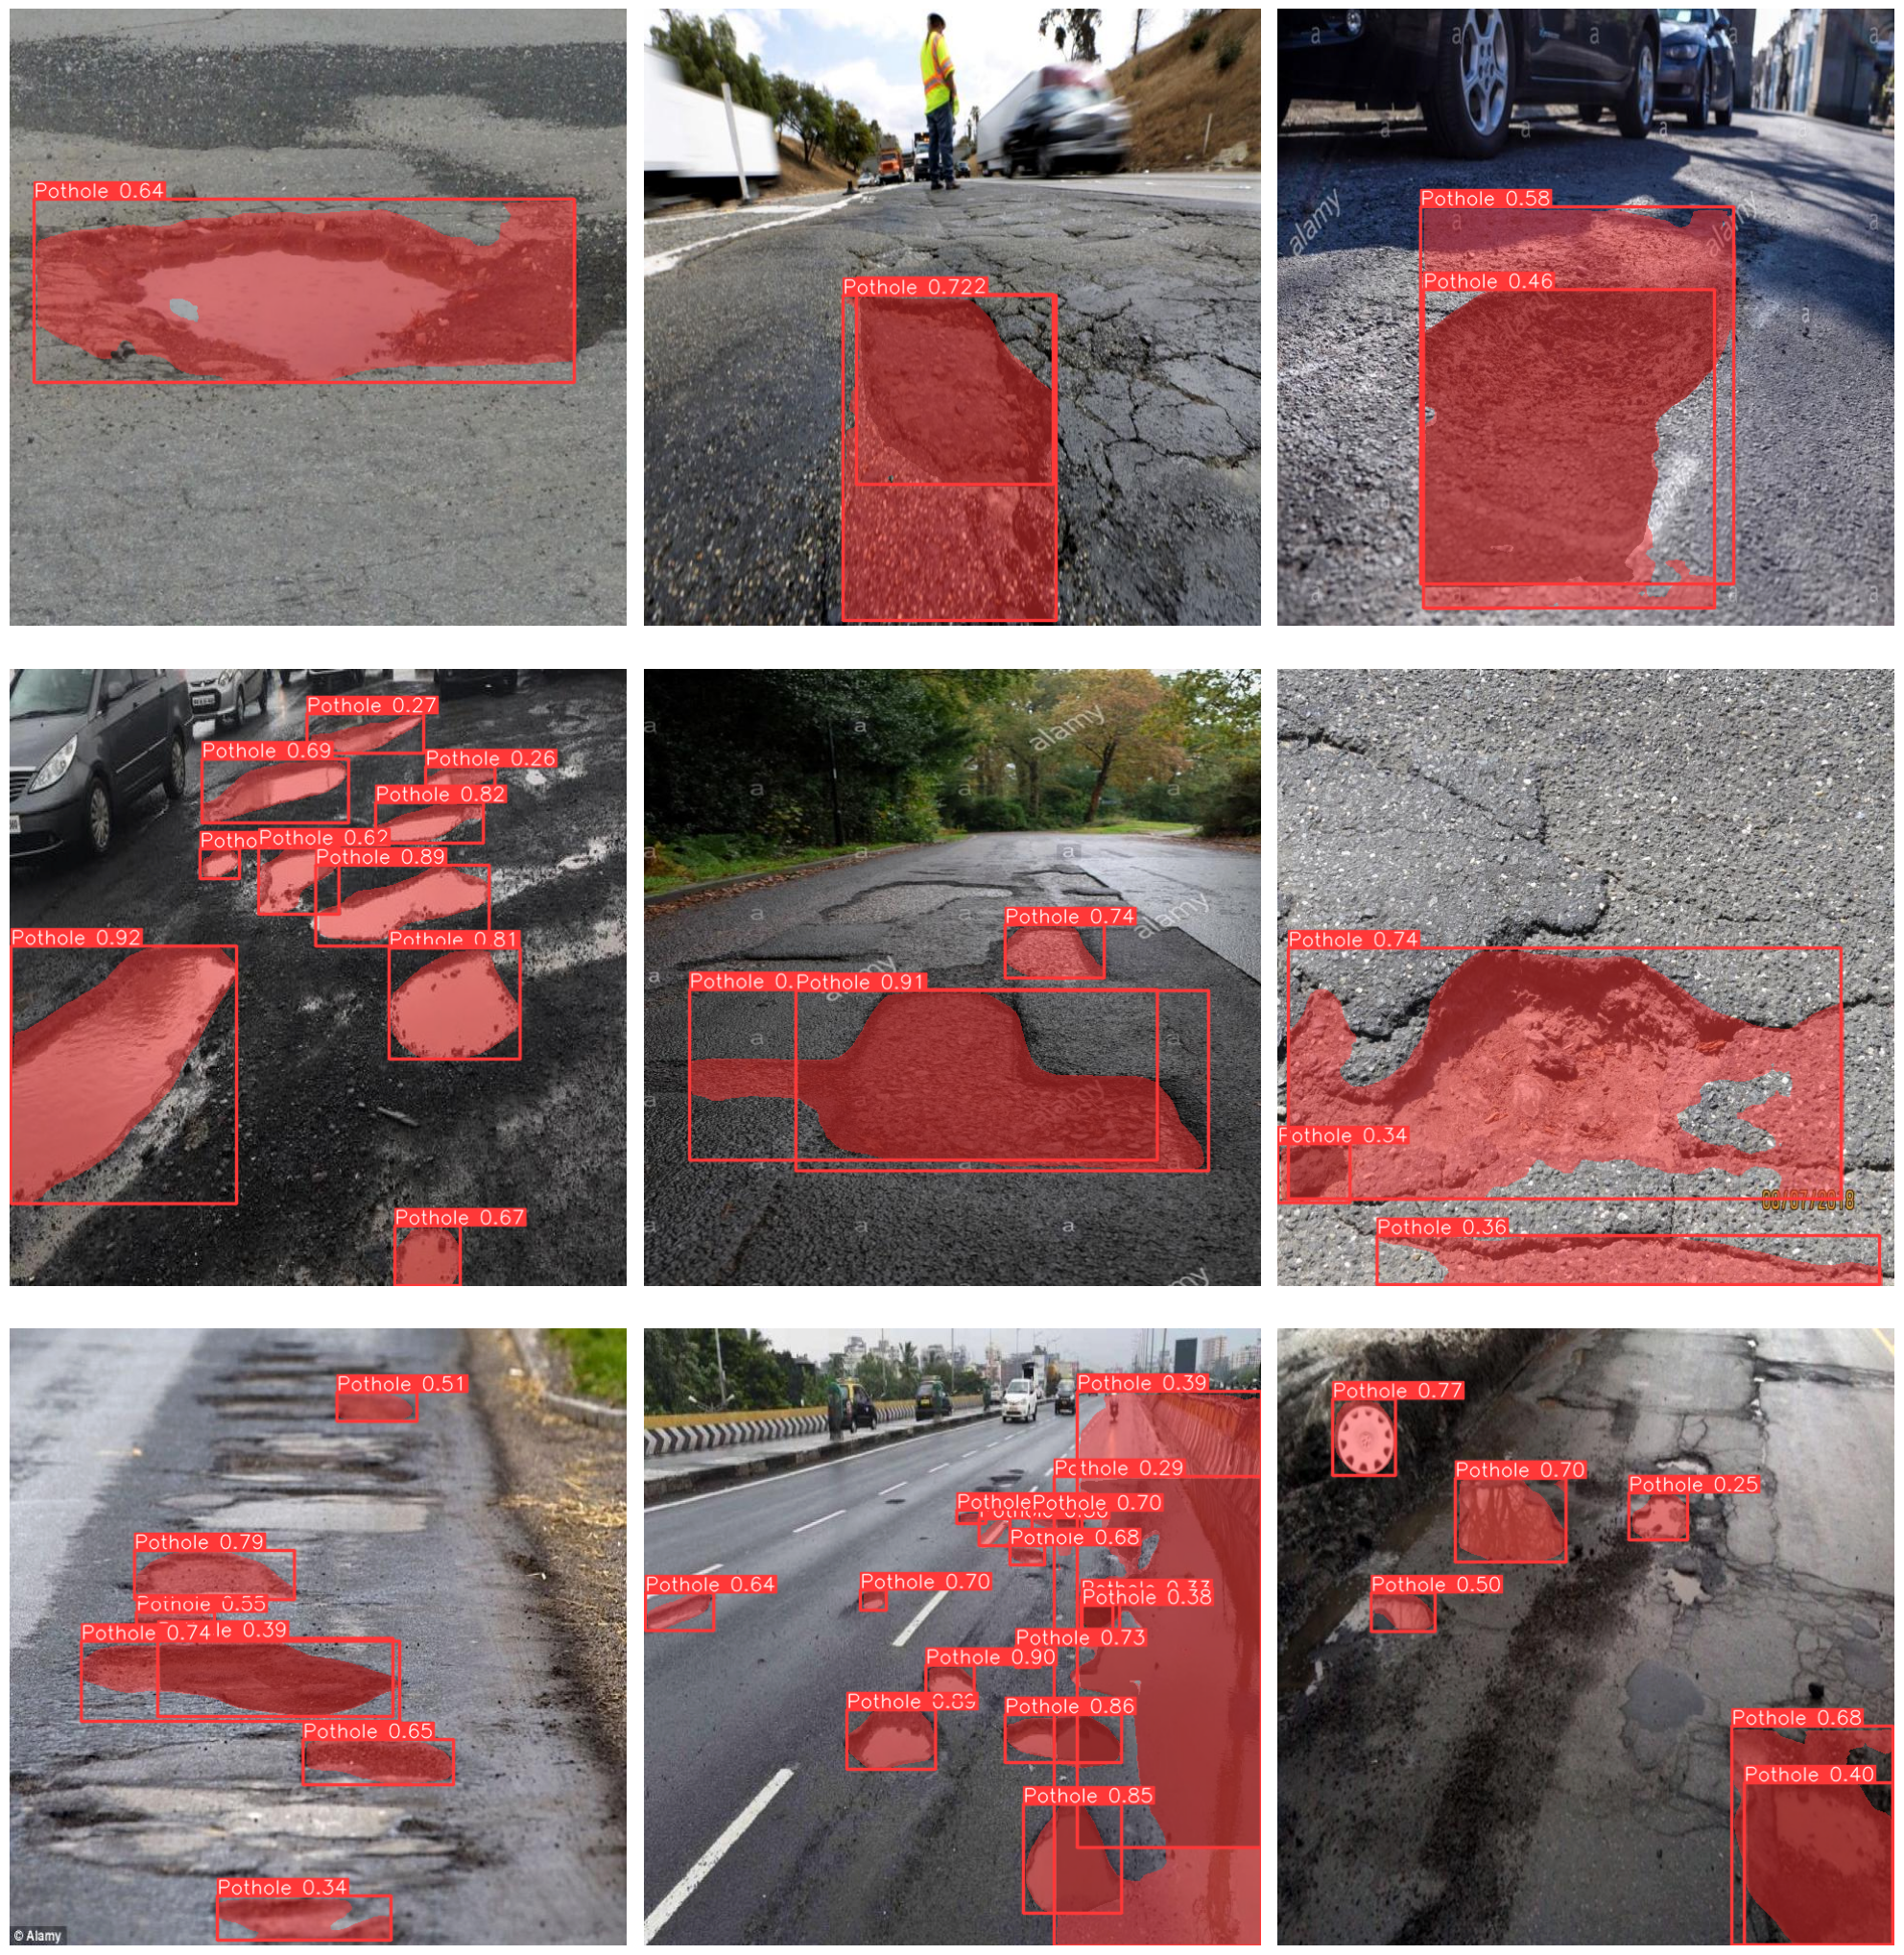

In [39]:
%matplotlib inline
valid_img_path = os.path.join(dataset_path, 'valid', 'images')
image_files = [file for file in os.listdir(valid_img_path) if file.endswith('.jpg')]
imageNum = len(image_files)
selected_images = [image_files[i] for i in range(0, imageNum, imageNum // 10)]
fig, axes = plt.subplots(3, 3, figsize=(20, 21))
for i, ax in enumerate(axes.flatten()):
    image_path = os.path.join(valid_img_path, selected_images[i])
    results = final_model.predict(source=image_path, imgsz=640)
    annotated_image = results[0].plot()
    annotated_image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
    ax.imshow(annotated_image_rgb)
    ax.axis('off')

plt.tight_layout()
plt.show()


In [42]:
import pickle
from collections import deque

In [45]:

video_path = "C:\\Users\\saksh\\OneDrive\\Desktop\\ML Projects\\Public Grievances(NICSI)\\data\\potholes\\sample_video.mp4"


font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 1
text_position = (40, 80)
font_color = (255, 255, 255)    
background_color = (0, 0, 255)  


damage_deque = deque(maxlen=10)


cap = cv2.VideoCapture(video_path)


fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('road_damage_assessment.avi', fourcc, 20.0, (int(cap.get(3)), int(cap.get(4))))

while cap.isOpened():
     
    ret, frame = cap.read()
    if ret:
        
        results = final_model.predict(source=frame, imgsz=640, conf=0.25)
        processed_frame = results[0].plot(boxes=False)
        
        
        percentage_damage = 0 
        
       
        if results[0].masks is not None:
            total_area = 0
            masks = results[0].masks.data.cpu().numpy()
            image_area = frame.shape[0] * frame.shape[1]  
            for mask in masks:
                binary_mask = (mask > 0).astype(np.uint8) * 255
                contour, _ = cv2.findContours(binary_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
                total_area += cv2.contourArea(contour[0])
            
            percentage_damage = (total_area / image_area) * 100

        
        damage_deque.append(percentage_damage)
        smoothed_percentage_damage = sum(damage_deque) / len(damage_deque)
            
        
        cv2.line(processed_frame, (text_position[0], text_position[1] - 10),
                 (text_position[0] + 350, text_position[1] - 10), background_color, 40)
        
        # Annotate the frame with the percentage of damage
        cv2.putText(processed_frame, f'Road Damage: {smoothed_percentage_damage:.2f}%', text_position, font, font_scale, font_color, 2, cv2.LINE_AA)         
    
        # Write the processed frame to the output video
        out.write(processed_frame)
        
        # Uncomment the following 3 lines if running this code on a local machine to view the real-time processing results
        cv2.imshow('Road Damage Assessment', processed_frame) # Display the processed frame
        if cv2.waitKey(1) & 0xFF == ord('q'): # Press Q on keyboard to exit the loop
            break 
    else:
        break


cap.release()
out.release()

# Close all the frames
# cv2.destroyAllWindows()



0: 384x640 3 Potholes, 27.0ms
Speed: 4.0ms preprocess, 27.0ms inference, 16.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 Potholes, 26.0ms
Speed: 4.0ms preprocess, 26.0ms inference, 16.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 Potholes, 26.0ms
Speed: 3.0ms preprocess, 26.0ms inference, 20.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 Potholes, 25.0ms
Speed: 5.0ms preprocess, 25.0ms inference, 15.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Potholes, 23.0ms
Speed: 3.0ms preprocess, 23.0ms inference, 12.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Potholes, 23.0ms
Speed: 3.0ms preprocess, 23.0ms inference, 12.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 Potholes, 15.0ms
Speed: 2.0ms preprocess, 15.0ms inference, 9.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Potholes, 15.0ms
Speed: 2.0ms preprocess, 15.0ms inference, 7.0ms postprocess per im


0: 384x640 4 Potholes, 14.0ms
Speed: 2.0ms preprocess, 14.0ms inference, 10.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 Potholes, 14.0ms
Speed: 2.0ms preprocess, 14.0ms inference, 12.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 Potholes, 14.0ms
Speed: 2.0ms preprocess, 14.0ms inference, 14.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 Potholes, 15.5ms
Speed: 2.0ms preprocess, 15.5ms inference, 12.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 Potholes, 15.5ms
Speed: 2.0ms preprocess, 15.5ms inference, 13.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 Potholes, 13.6ms
Speed: 3.0ms preprocess, 13.6ms inference, 10.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 Potholes, 18.0ms
Speed: 2.0ms preprocess, 18.0ms inference, 10.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 Potholes, 13.0ms
Speed: 3.0ms preprocess, 13.0ms inference, 9.0ms postprocess per i


0: 384x640 3 Potholes, 14.0ms
Speed: 2.0ms preprocess, 14.0ms inference, 8.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Pothole, 21.0ms
Speed: 2.0ms preprocess, 21.0ms inference, 5.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 Potholes, 14.0ms
Speed: 3.0ms preprocess, 14.0ms inference, 8.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Potholes, 16.3ms
Speed: 3.0ms preprocess, 16.3ms inference, 7.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Potholes, 25.0ms
Speed: 2.0ms preprocess, 25.0ms inference, 9.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Potholes, 24.0ms
Speed: 2.0ms preprocess, 24.0ms inference, 10.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Pothole, 14.0ms
Speed: 2.0ms preprocess, 14.0ms inference, 6.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Pothole, 14.0ms
Speed: 4.0ms preprocess, 14.0ms inference, 5.0ms postprocess per image at s

Speed: 2.0ms preprocess, 15.0ms inference, 8.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 Potholes, 15.0ms
Speed: 2.0ms preprocess, 15.0ms inference, 8.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 Potholes, 13.0ms
Speed: 2.0ms preprocess, 13.0ms inference, 9.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 Potholes, 13.5ms
Speed: 2.0ms preprocess, 13.5ms inference, 9.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 Potholes, 14.0ms
Speed: 2.0ms preprocess, 14.0ms inference, 8.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 Potholes, 14.0ms
Speed: 2.0ms preprocess, 14.0ms inference, 8.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 Potholes, 15.0ms
Speed: 2.0ms preprocess, 15.0ms inference, 12.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 Potholes, 22.0ms
Speed: 3.0ms preprocess, 22.0ms inference, 8.0ms postprocess per image at shape (1, 3, 384, 640)

0: 38


0: 384x640 4 Potholes, 20.0ms
Speed: 3.0ms preprocess, 20.0ms inference, 10.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Potholes, 19.0ms
Speed: 3.0ms preprocess, 19.0ms inference, 9.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Potholes, 15.0ms
Speed: 3.0ms preprocess, 15.0ms inference, 7.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Potholes, 14.0ms
Speed: 2.0ms preprocess, 14.0ms inference, 7.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Potholes, 15.0ms
Speed: 2.0ms preprocess, 15.0ms inference, 7.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 Potholes, 14.0ms
Speed: 3.0ms preprocess, 14.0ms inference, 8.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 Potholes, 14.0ms
Speed: 3.0ms preprocess, 14.0ms inference, 8.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 Potholes, 14.0ms
Speed: 2.0ms preprocess, 14.0ms inference, 9.0ms postprocess per image a


0: 384x640 4 Potholes, 14.0ms
Speed: 2.0ms preprocess, 14.0ms inference, 11.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 Potholes, 14.0ms
Speed: 3.0ms preprocess, 14.0ms inference, 10.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 Potholes, 14.0ms
Speed: 4.0ms preprocess, 14.0ms inference, 11.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 Potholes, 24.0ms
Speed: 3.0ms preprocess, 24.0ms inference, 14.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 Potholes, 14.0ms
Speed: 3.0ms preprocess, 14.0ms inference, 14.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 Potholes, 14.0ms
Speed: 2.0ms preprocess, 14.0ms inference, 12.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 Potholes, 14.0ms
Speed: 3.0ms preprocess, 14.0ms inference, 10.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 Potholes, 14.0ms
Speed: 3.0ms preprocess, 14.0ms inference, 10.0ms postprocess per 